In [2]:
# Aufgabe 1.1
import numpy as np
c = np.array([299793,299792,299782])
s = np.array([2.0,4.5,25])/2
m=np.dot(c,1/s**2)/np.sum(1/s**2)
print(m)
print(np.sqrt(1/np.sum(1/s**2)))
print(np.sqrt(np.dot((c-m)**2,1/s**2)/np.sum(1/s**2)/2))


299792.7774532806
0.9113794376032194
0.6155367017876124


In [3]:
# Aufgabe 1.2
import pandas as pd

data = pd.read_csv("dat_1.2.csv",header=None,sep="\t")
data = data.to_numpy()
d = np.zeros((12,4))
# abschneiden der index-Zeile
for i in range(12):
    d[i,1:]=data[i,:]
data = d

S_x = np.dot(data[:,1],1/data[:,3]**2)
S_y = np.dot(data[:,2],1/data[:,3]**2)
S_xx = np.dot(data[:,1]**2,1/data[:,3]**2)
S_xy = 0
S = 0
for i in range(len(data[:,1])):
    S_xy += data[i,1]*data[i,2]/data[i,3]**2
    S += 1/data[i,3]**2
D = (S*S_xx-S_x**2)
# affin-lineares Modell
a = (S_xx*S_y-S_x*S_xy)/D
b = (S*S_xy-S_x*S_y)/D
sig_a = (S_xx/D)
sig_b = S/D
sig_R = S*D**3/(S*S_xy-S_x*S_y)**4
# lineares Modell
sig_R2 = S_xx**3/S_xy**4
R2 = S_xx/S_xy
chi_sq2= np.dot((data[:,2]-data[:,1]/R2)**2,1/data[:,3]**2)
# wieder affin-lineares Modell
chi_sq = 0
for i in range(12):
    chi_sq += (data[i,2]-a-b*data[i,1])**2/data[i,3]**2
# für lineares Model entsprechend umändern
print(f"I_0={np.sqrt(sig_a)},R={np.sqrt(sig_R)},sig_I_0={np.sqrt(sig_b)},sig_R={sig_R}")
print(f"chi_sq={chi_sq}, normiertes chi_sq={chi_sq/(10)}")


I_0=0.008250006732859033,R=0.04483888324348159,sig_I_0=0.0329238978905082,sig_R=0.0010839830523046102
chi_sq=81.96000181083537, normiertes chi_sq=8.196000181083537


array([-0.06208545, -0.04817091,  0.02374364, -0.01634182, -0.02942727,
        0.01948728, -0.02459818,  0.00131637,  0.05523091,  0.05614546,
        0.01006001,  0.10197455])

In [4]:
# Diese Zelle kann glaube ich ignoriert werden.
data3 = pd.read_csv("dat_1.3.csv",header=None,sep="\t")


data3 = data3.to_numpy()
data3[:,0]=np.sqrt(data3[:,2])
with open("dattable_1.3.csv","w") as file:
    for i in range(10):
        if (i!=9):
            file.write(f"{data3[i,1]}\t{data3[i,2]}\t{data3[i,0]}\n")
        else:
            file.write(f"{data3[i,1]}\t{data3[i,2]}\t{data3[i,0]}")

### Aufgabe 1.3

In [ ]:
import matplotlib.pyplot as plt
import sympy as sym

data3 = pd.read_csv("dat_1.3.csv",header=None,sep="\t")
import scipy.linalg as lin

data3 = data3.to_numpy()
# Standardabweicheung wird in 0. Spalte von data3 eingetragen
data3[:,0]=np.sqrt(data3[:,2])
param = []

solution_0 = []
det = np.zeros(10)
# für jeden der einigermaßen sinnvollen Grade wird die Lösung bestimmt
for n in range(1,11):
    A = np.zeros((n,n))
    Null = sym.matrices.zeros(n,1)
    b = np.zeros(n)
    # Matrix für Gleichungssystem der linearen Koeffizienten wird initialisiert
    for i in range(n):
        for j in range(n):
            for k in range(10):
                A[i,j]+=data3[k,1]**(i+j)/data3[k,0]**2
        for k in range(10):
            b[i] += data3[k,1]**i*data3[k,2]/data3[k,0]**2
    # Matrix wird in sympy matrix umgewandelt, weil es damit besser ging
    a = sym.matrices.Matrix(A)
    c = sym.matrices.Matrix(b)
    
    det[n-1]= a.det()

    solution_0.append(a.LUsolve(Null))
    # Lösung wird ermittelt
    param.append(a.LUsolve(c))
print(solution_0)
print(det)  
print(param)
x = np.linspace(-np.pi+0.35,0-0.35)
chi_sq = np.zeros(10)
# Lösungen werden geplottet
for n in range(1,11):
    # Daten für Plot werden generiert
    y = np.zeros_like(x)
    for i in range(n):
        y += np.array(param[n-1]).astype('float64')[i]*np.cos(x)**i\
    # ch^2 wird berechnet und später in eine Datei gesc
    fn = np.zeros(10)
    for k in range(10):
        for i in range(n):
            fn[k] += np.array(param[n-1]).astype('float64')[i]*data3[k,1]**i
    chi_sq[n-1] = (np.dot((data3[:,2]-fn)**2,1/data3[:,0]**2))
    
    fig, ax = plt.subplots(1,1)
    plt.errorbar((np.arccos(data3[:,1])-np.pi)[::-1],data3[:,2],data3[:,0],linestyle='none')
    ax.plot(x,y)
    ax.set_xlabel(r"$\theta$")
    ax.set_ylabel("N")
    plt.savefig(f"cosfit_{n-1}.png")
    plt.show()
# chi^2 wird ausgegeben
print(f"chi_sq={chi_sq}")
norm = 10 -np.arange(1,11)
chi_sq/norm
# bestimmte parameter werden in eine Datei geschrieben
with open("result_cosfit.csv","w") as file:
    for n in range(10):
        file.write(f"{n}")
        for i in range(len(param[n])):
            file.write(f"\t{param[n][i]}")
        for j in range(9-n):
            file.write("\t0")
        if (n!=9):
            file.write("\n")

In [13]:
with open("chi_cosfit.csv","w") as file:
    for n in range(10):
        file.write(f"{n}\t")
        file.write("{}\t{:.3}\n".format(chi_sq[n],chi_sq[n]/norm[n]))

/var/folders/ch/3xykztb11m7_dgk_2xh5mvlc0000gp/T/ipykernel_1100/852699371.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  file.write("{}\t{:.3}\n".format(chi_sq[n],chi_sq[n]/norm[n]))


[Matrix([[57.8452477523616]]), Matrix([
[82.6551307957833],
[ 99.099790607275]]), Matrix([
[138.471076038774],
[185.955485825497],
[ 182.40816294162]]), Matrix([
[141.955071050893],
[209.097551825508],
[208.012042789867],
[55.0341122234623]]), Matrix([
[142.301243073574],
[210.248291182585],
[ 214.38385582198],
[ 60.763904085811],
[12.0228438161985]]), Matrix([
[142.321035313718],
[210.495723049644],
[214.639101145822],
[62.0635941307936],
[13.0055988951517],
[2.12436581686236]]), Matrix([
[143.102017799079],
[211.072322919555],
[218.719361417046],
[64.6974536603022],
[25.0661219750136],
[ 8.6737521612441],
[15.0230247493569]]), Matrix([
[ 142.941735469637],
[ 208.751341565018],
[ 217.695847624183],
[ 58.7526531215309],
[ 22.7333838227178],
[-2.08920373976619],
[ 10.9253134158365],
[ -10.404400833908]]), Matrix([
[  140.88500547823],
[ 207.529630958836],
[ 206.801125920773],
[ 55.6724155813226],
[ 2.93974590540259],
[-7.27346555638653],
[-14.8852852886082],
[-16.2558368533172],
[-18.18

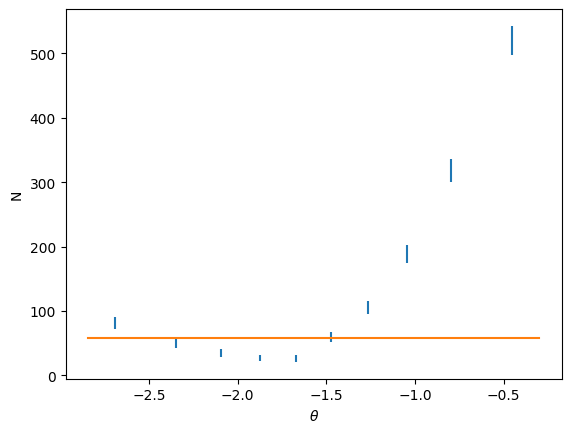

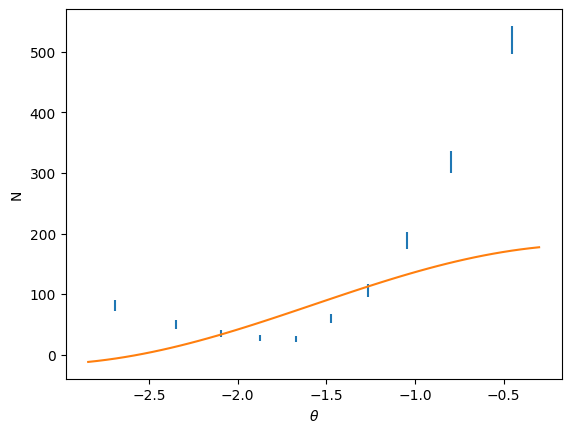

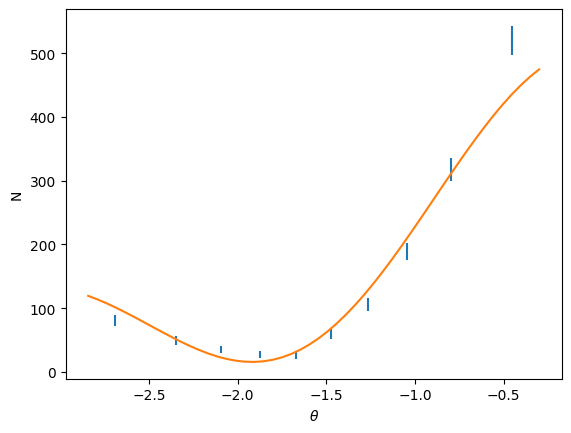

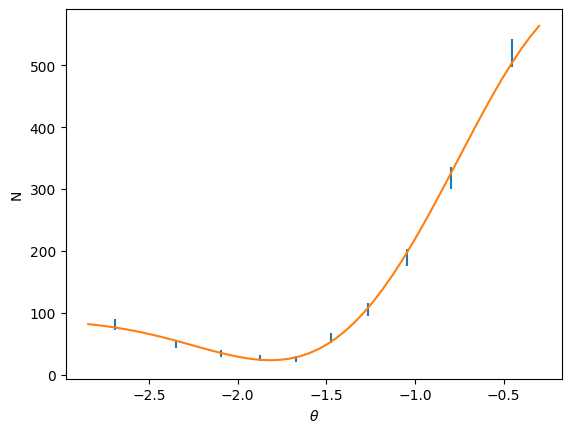

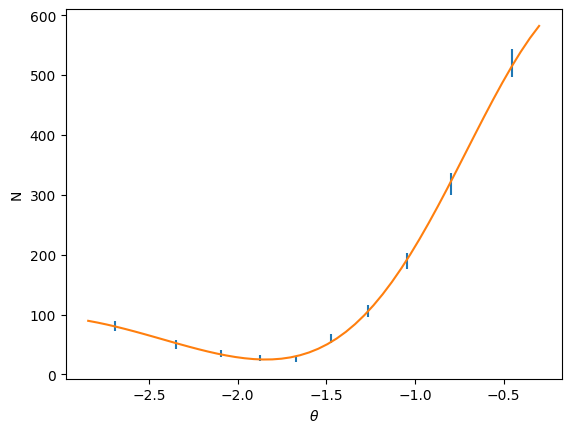

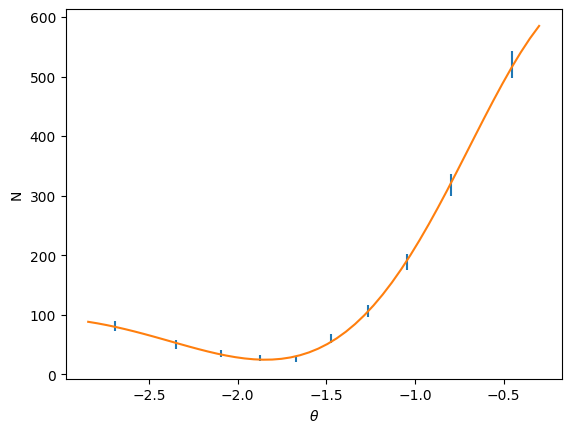

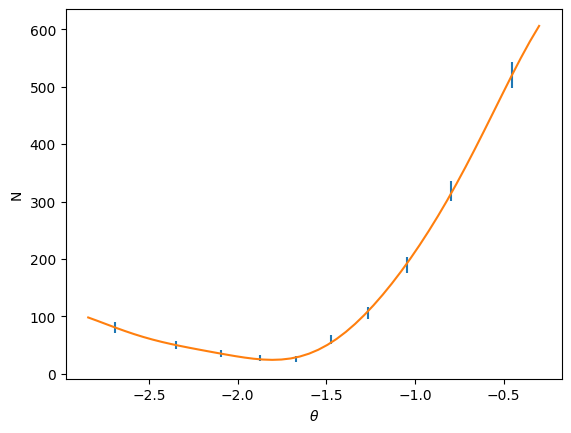

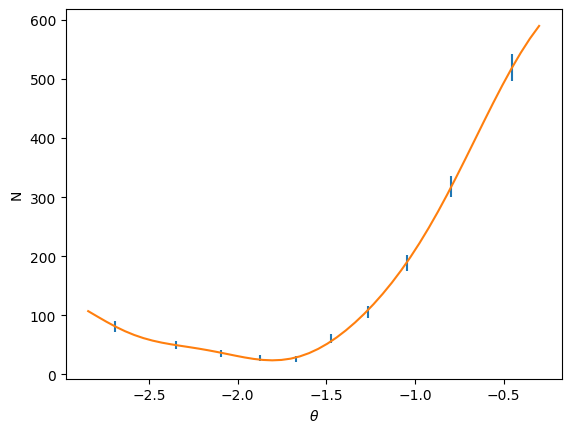

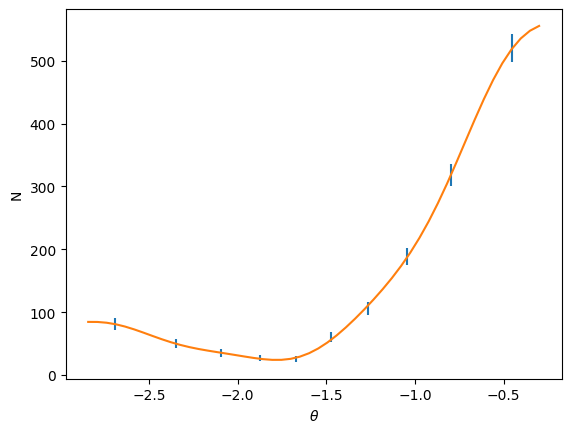

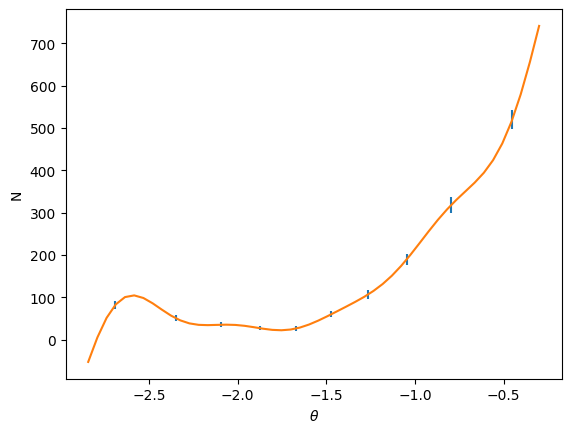

[8.33547522e+02 5.85448692e+02 3.64096478e+01 2.84989163e+00
 1.68602272e+00 1.66264864e+00 9.35496748e-01 7.68438971e-01
 5.66188874e-01 7.80048957e-27]


/var/folders/ch/3xykztb11m7_dgk_2xh5mvlc0000gp/T/ipykernel_1100/366947126.py:52: RuntimeWarning: divide by zero encountered in divide
  chi_sq/norm


In [14]:
# für die Anpassung der Legendre Polynome bin ich exakt gleich vorgegangen
import matplotlib.pyplot as plt
import sympy as sym

data3 = pd.read_csv("dat_1.3.csv",header=None,sep="\t")
import scipy.linalg as lin
import scipy.special as sc

data3 = data3.to_numpy()
data3[:,0]=np.sqrt(data3[:,2])
ang = (np.arccos(data3[:,1])-np.pi)[::-1]
param = []
for n in range(1,11):
    A = np.zeros((n,n))

    b = np.zeros(n)
    for i in range(n):
        for j in range(n):
            for k in range(10):
                A[i,j]+=sc.legendre(i)(data3[k,1])*sc.legendre(j)(data3[k,1])/data3[k,0]**2
        for k in range(10):
            b[i] += sc.legendre(i)(data3[k,1])*data3[k,2]/data3[k,0]**2
    a = sym.matrices.Matrix(A)
    c = sym.matrices.Matrix(b)
    
    
   
    param.append(a.LUsolve(c))
    
print(param)
x = np.linspace(-np.pi+0.3,-0.3)
chi_sq = np.zeros(10)

for n in range(1,11):
    
    y = np.zeros_like(x)
    for i in range(n):
        y += np.array(param[n-1]).astype('float64')[i]*sc.legendre(i)(np.cos(x))
    fn = np.zeros(10)
    for k in range(10):
        for i in range(n):
            fn[k] += np.array(param[n-1]).astype('float64')[i]*sc.legendre(i)(np.cos(ang[k]))
    chi_sq[n-1] = (np.dot((data3[:,2]-fn)**2,1/data3[:,0]**2))
    
    fig, ax = plt.subplots(1,1)
    plt.errorbar((np.arccos(data3[:,1])-np.pi)[::-1],data3[:,2],data3[:,0],linestyle='none')
    ax.plot(x,y)
    ax.set_xlabel(r"$\theta$")
    ax.set_ylabel("N")
    plt.show()
print(chi_sq)
norm = 10 -np.arange(1,11)
chi_sq/norm
with open("result_lpfit.csv","w") as file:
    for n in range(10):
        file.write(f"{n}")
        for i in range(len(param[n])):
            file.write(f"\t{param[n][i]}")
        for j in range(9-n):
            file.write("\t0")
        if (n!=9):
            file.write("\n")

In [18]:
with open("chi_lpfit.csv","w") as file:
    for n in range(10):
        file.write(f"{n}\t")
        file.write("{:.3}\t{:.3}\n".format(chi_sq[n],chi_sq[n]/norm[n]))

/var/folders/ch/3xykztb11m7_dgk_2xh5mvlc0000gp/T/ipykernel_1100/812642917.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  file.write("{:.3}\t{:.3}\n".format(chi_sq[n],chi_sq[n]/norm[n]))
